In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [49]:
df.shape
df.reset_index()

AttributeError: 'DataFrame' object has no attribute 'reset'

15820
15820
[15820, 15820]


<BarContainer object of 2 artists>

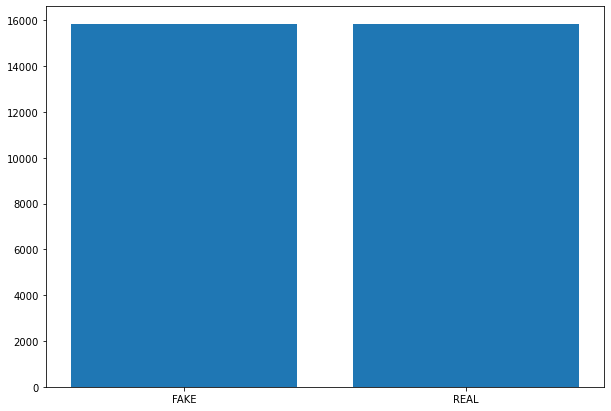

In [84]:
p=df[label=="FAKE"].reset_index()
po=(p.count().sum())
print(po)
C=df[label=="REAL"].reset_index()
Co=p.count().sum()
print(Co)
ko=["FAKE","REAL"]
koo=[po,Co]
print(koo)
fig = plt.figure(figsize =(10, 7))
 
plt.bar(ko,koo)






In [13]:
label=df.label

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],label,test_size=0.2,random_state=7)

In [20]:
tfid_vectorizer=TfidfVectorizer(stop_words="english",max_df=0.7)
print(tfid_vectorizer)

TfidfVectorizer(max_df=0.7, stop_words='english')


In [23]:
tfidtrain=tfid_vectorizer.fit_transform(x_train)
tfidtest=tfid_vectorizer.transform(x_test)

In [25]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidtrain,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [27]:
y_prid=pac.predict(tfidtest)
score=accuracy_score(y_test,y_prid)
print(score)

0.9265982636148382


In [28]:
confusion_matrix(y_test,y_prid)

array([[589,  49],
       [ 44, 585]], dtype=int64)